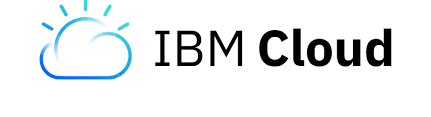

# Data Visualization

The first steps of the EDA process are to summarize the data and use storytelling to connect the business opportunity to the data.  [Jupyter notebooks](http://jupyter.org) are arguably the principal tool of the data science community for EDA.  There are other similarly powerful tools like [Zeppelin](https://zeppelin.apache.org) and [RStudio](https://www.rstudio.com), but Jupyter has become an industry standard in the Python ecosystem.  Ironically, there is even a project called [nbestimate](https://github.com/parente/nbestimate) that collects statistics about the number of Jupyter notebooks in [GitHub](https://github.com) then [performs some data visualization on the results](https://nbviewer.jupyter.org/github/parente/nbestimate/blob/master/estimate.ipynb).  Currently, there are more than 5 million notebooks saved in GitHub..  

Despite widespread adoption there is one important caveat to keep in mind---they do not work well with [version control](https://en.wikipedia.org/wiki/Version_control).

### Getting started

**This unit is interactive**.  During this unit we encourage you to [open this file as a notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest).  Download the notebook from the following link then open it locally using a Jupyter server or use your IBM cloud account to login to Watson Studio.  Inside of Watson Studio cloud if you have not already ensure that this notebook is loaded as part of the *project* for this course. As a reminder fill in all of the places in this notebook marked with ***YOUR CODE HERE*** or ***YOUR ANSWER HERE***.  

**You will need the following files to complete this case study**

* [m2-u2-data-visualization.ipynb](m2-u2-data-visualization.ipynb)
* [world-happiness.csv](../data/world-happiness.csv)
* [make-happiness-summary-plot.py](../scripts/make-happiness-summary-plot.py)

This unit is organized into the following sections:

1. EDA and pandas
2. Data visualization best practices
2. Essentials of matplotlib
3. Pairs plots and correlation
4. Beyond simple plots

### Data visualization in Python


This unit covers the topic of data visualization and this course is taught in Python.  There are numerous frameworks out there and it is reasonable to use other languages, like R, to carry out data visualization.  The reason for using matplotlib is that it is most common tool once you have accounted for direct and indirect usage.  See the visualization below to get a better understanding how matplotlib fits into the Python landscape of visualization tools.

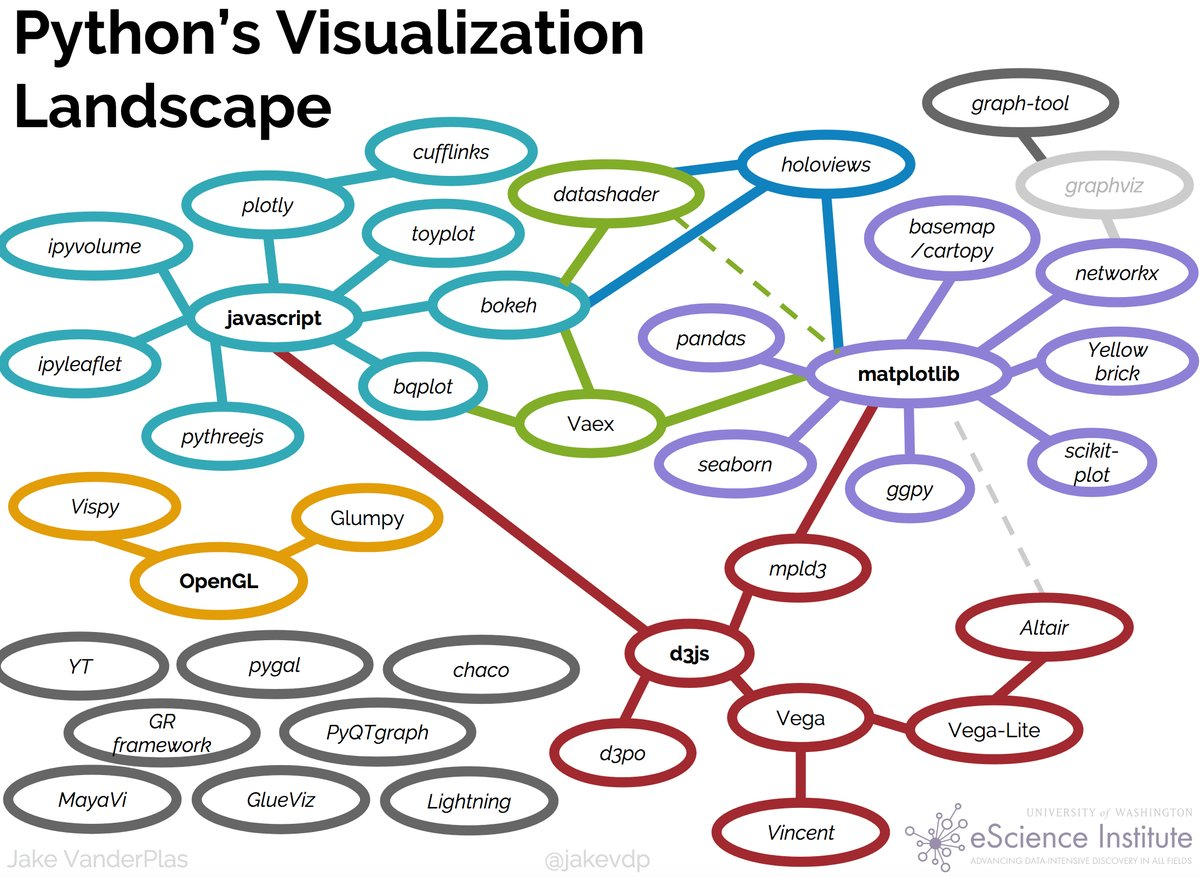

The image was created by [Jake Vanderplas](http://vanderplas.com) at the [eScience institute](https://escience.washington.edu) and if you are interested in learning more then [Anaconda has an article on the topic](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries).

We will focus on simple plots and for this the `matplotlib` and `seaborn` libraries are the most widely used.

It is expected that you already know and use both pandas and matplotlib on a regular basis.  For those of you who are comfortable with plotting---meaning that you can readily produce any of the several dozen types common plots used in data science, then this unit will serve as a review.  In the above sections we will touch on the essential tools, best practices and survey the landscape of available tools for more advanced plotting.

If you would like additional context a few links are available below:

- [Anaconda's article on 'moving toward convergence'](https://www.anaconda.com/blog/developer-blog/python-data-visualization-moving-toward-convergence/)
- [Anaconda's article on the future of Python visualization libraries](https://www.anaconda.com/blog/developer-blog/python-data-visualization-2018-where-do-we-go-from-here/)

- [Matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

First let's make all of the necessary imports and configure the plot fonts.  If you use Jupyter notebooks as a presentation tool then ensuring that your fonts are readable both the professional things to do and it will help with communication.

In [3]:
import os
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

## specify the directory you saved the data and images in
DATA_DIR = os.path.join("..","data")
IMAGE_DIR = os.path.join("..","images")

Let's load the data that we will be using to practice EDA and then perform some basic cleanup.

In [5]:
## load the data and print the shape
df = pd.read_csv(os.path.join(DATA_DIR, "world-happiness.csv"), index_col=0)
print("df: {} x {}".format(df.shape[0], df.shape[1]))

## clean up the column names
#df.columns = [re.sub("\s+","_",col) for col in df.columns.tolist()]

## check the first few rows
df.head(n=4)

df: 495 x 12


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015


In [7]:
## clean up the column names,
##added _ inplaces of spaces
df.columns = [re.sub("\s+","_",col) for col in df.columns.tolist()]

## check the first few rows
df.head(n=4)

,Country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015


In [9]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))

Missing Value Summary
-----------------------------------
Country                           0
Region                            0
Happiness_Rank                   25
Happiness_Score                  25
Economy_(GDP_per_Capita)         25
Family                           25
Health_(Life_Expectancy)         25
Freedom                          25
Trust_(Government_Corruption)    25
Generosity                       25
Dystopia_Residual                25
Year                              0
dtype: int64


In [10]:
## drop the rows that have NaNs
print("Original Matrix:", df.shape)
df.dropna(inplace=True)
print("After NaNs removed:", df.shape)

Original Matrix: (495, 12)
After NaNs removed: (470, 12)


In [11]:
df.isnull().sum(axis = 0)

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
Year                             0
dtype: int64

### The data

The original data are produced by the [UN Sustainable Development Solutions Network (SDSN)](https://www.unsdsn.org) and the report is compiled and available at [https://worldhappiness.report](https://worldhappiness.report). The following  is the messaging on the report website:

> The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The report is produced by the United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation.
 
> The World Happiness Report was written by a group of independent experts acting in their personal capacities. Any views expressed in this report do not necessarily reflect the views of any organization, agency or program of the United Nations.

so knowing this it makes sense to [sort the data](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [12]:
df.sort_values(['Year', "Happiness_Score"], ascending=[True, False], inplace=True)
df.head(n=4)

,Country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015


## EDA and pandas

The pandas documentation is quite good compared to other packages and there are a substantial number of arguments available for most of the functions.  See the [docs for pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) as an example of this point.  The Python [package pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html) is very commonly used during EDA.  If you are not yet familiar with it or your need a refresher the [pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) are a good place to start.

[Pivot tables](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) and [groupbys](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) are methods that perform aggregations over a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [13]:
columns_to_show = ["Happiness_Score",
                   "Health_(Life_Expectancy)"]
pd.pivot_table(df, index= 'Year', 
               values=columns_to_show,aggfunc='mean').round(2)

,Happiness_Score,Health_(Life_Expectancy)
Year,,
2015,5.38,0.63
2016,5.38,0.56
2017,5.35,0.55


In [14]:
df.groupby(['Year'])[columns_to_show].mean().round(3)

,Happiness_Score,Health_(Life_Expectancy)
Year,,
2015,5.376,0.630
2016,5.382,0.558
2017,5.354,0.551


There [are some differences between pivot_table and groupby](https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference), but either can be used to create aggregate summary tables.  See the [pandas tutorial on reshaping and pivots](http://pandas-docs.github.io/pandas-docs-travis/user_guide/reshaping.html) to learn more.  Also note that you can have more than one index.

In [15]:
 pd.pivot_table(df, index = ['Region', 'Year'], values=columns_to_show).round(3)

Happiness_Score  \
Region                          Year                    
Australia and New Zealand       2015            7.285   
                                2016            7.323   
                                2017            7.299   
Central and Eastern Europe      2015            5.333   
                                2016            5.371   
                                2017            5.410   
Eastern Asia                    2015            5.626   
                                2016            5.624   
                                2017            5.647   
Latin America and Caribbean     2015            6.145   
                                2016            6.102   
                                2017            5.958   
Middle East and Northern Africa 2015            5.407   
                                2016            5.386   
                                2017            5.370   
North America                   2015            7.273   
                                2016            7.254   
                                2017            7.155   
Southeastern Asia               2015            5.317   
                                2016            5.339   
                                2017            5.445   
Southern Asia                   2015            4.581   
                                2016            4.563   
                                2017            4.628   
Sub-Saharan Africa              2015            4.203   
                                2016            4.136   
                                2017            4.112   
Western Europe                  2015            6.690   
                                2016            6.686   
                                2017            6.704   

                                      Health_(Life_Expectancy)  
Region                          Year                            
Australia and New Zealand       2015                     0.920  
                                2016                     0.841  
                                2017                     0.830  
Central and Eastern Europe      2015                     0.719  
                                2016                     0.632  
                                2017                     0.636  
Eastern Asia                    2015                     0.877  
                                2016                     0.807  
                                2017                     0.808  
Latin America and Caribbean     2015                     0.704  
                                2016                     0.613  
                                2017                     0.611  
Middle East and Northern Africa 2015                     0.706  
                                2016                     0.616  
                                2017                     0.606  
North America                   2015                     0.884  
                                2016                     0.803  
                                2017                     0.804  
Southeastern Asia               2015                     0.677  
                                2016                     0.561  
                                2017                     0.582  
Southern Asia                   2015                     0.541  
                                2016                     0.454  
                                2017                     0.457  
Sub-Saharan Africa              2015                     0.282  
                                2016                     0.240  
                                2017                     0.225  
Western Europe                  2015                     0.909  
                                2016                     0.826  
                                2017                     0.825

When we want to summarize continuous data the functions [qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) and [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) are useful to partition them.  The binned observations can be summarized with the same tabular functions as above.

### QUESTION: tabular summary

Use `pd.qcut()` to bin the data by `Happiness_Rank` and create a pivot table that summarizes `Happiness_Score` and `Health_(Life_Expectancy)` with respect to `Region`. 

Take a minute to think about presenting this information in a way that makes it easily interpretable. How many bins should you use? Is there a way to make those bins more understandable?

In [17]:
## YOUR CODE HERE

happy_rank_labels = ['Very Happy', 'Happy', 'Happy/Unhappy', 'Unhappy', 'Very Unhappy']
df['Happiness_Rank_bins'] = pd.qcut(df['Happiness_Rank'], q=5, labels=happy_rank_labels)

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Happiness_Rank,470.0,78.829787,45.281408,1.00000,40.000000,79.000000,118.000000,158.000000
Happiness_Score,470.0,5.370728,1.136998,2.69300,4.509000,5.282500,6.233750,7.587000
Economy_(GDP_per_Capita),470.0,0.927830,0.415584,0.00000,0.605292,0.995439,1.252443,1.870766
Family,470.0,0.990347,0.318707,0.00000,0.793000,1.025665,1.228745,1.610574
Health_(Life_Expectancy),470.0,0.579968,0.240161,0.00000,0.402301,0.630053,0.768298,1.025250
Freedom,470.0,0.402828,0.150356,0.00000,0.297615,0.418347,0.516850,0.669730
Trust_(Government_Corruption),470.0,0.134790,0.111313,0.00000,0.059777,0.099502,0.173161,0.551910
Generosity,470.0,0.242241,0.131543,0.00000,0.152831,0.223140,0.315824,0.838075
Dystopia_Residual,470.0,2.092717,0.565772,0.32858,1.737975,2.094640,2.455575,3.837720
Year,470.0,2015.993617,0.816907,2015.00000,2015.000000,2016.000000,2017.000000,2017.000000


In [24]:
df['Happiness_Rank'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 15

In [25]:
pd.pivot_table(df, index = ['Happiness_Rank_bins','Region'], values=columns_to_show).round(3)

Happiness_Score  \
Happiness_Rank_bins Region                                             
Very Happy          Australia and New Zealand                  7.303   
                    Central and Eastern Europe                 6.570   
                    Latin America and Caribbean                6.742   
                    Middle East and Northern Africa            6.918   
                    North America                              7.227   
                    Southeastern Asia                          6.633   
                    Western Europe                             7.130   
Happy               Central and Eastern Europe                 5.881   
                    Eastern Asia                               6.065   
                    Latin America and Caribbean                6.049   
                    Middle East and Northern Africa            6.198   
                    Southeastern Asia                          6.158   
                    Western Europe                             6.096   
Happy/Unhappy       Central and Eastern Europe                 5.330   
                    Eastern Asia                               5.344   
                    Latin America and Caribbean                5.412   
                    Middle East and Northern Africa            5.325   
                    Southeastern Asia                          5.274   
                    Southern Asia                              5.209   
                    Sub-Saharan Africa                         5.308   
                    Western Europe                             5.400   
Unhappy             Central and Eastern Europe                 4.703   
                    Eastern Asia                               4.912   
                    Latin America and Caribbean                4.765   
                    Middle East and Northern Africa            4.714   
                    Southeastern Asia                          4.751   
                    Southern Asia                              4.614   
                    Sub-Saharan Africa                         4.570   
                    Western Europe                             4.945   
Very Unhappy        Central and Eastern Europe                 4.236   
                    Latin America and Caribbean                3.815   
                    Middle East and Northern Africa            3.589   
                    Southeastern Asia                          4.050   
                    Southern Asia                              3.750   
                    Sub-Saharan Africa                         3.775   

                                                     Health_(Life_Expectancy)  
Happiness_Rank_bins Region                                                     
Very Happy          Australia and New Zealand                           0.864  
                    Central and Eastern Europe                          0.788  
                    Latin America and Caribbean                         0.733  
                    Middle East and Northern Africa                     0.803  
                    North America                                       0.830  
                    Southeastern Asia                                   0.892  
                    Western Europe                                      0.848  
Happy               Central and Eastern Europe                          0.657  
                    Eastern Asia                                        0.893  
                    Latin America and Caribbean                         0.606  
                    Middle East and Northern Africa                     0.666  
                    Southeastern Asia                                   0.671  
                    Western Europe                                      0.883  
Happy/Unhappy       Central and Eastern Europe                          0.652  
                    Eastern Asia                                        0.867  
                    Latin Am

## Data visualization best practices

When tables like the one we just created become difficult to navigate it can be useful to use a simple plot to summarize the data.  It is possible that both a table and a plot might be needed to communicate the findings and one common practice is to include an appendix in the deliverable.  Another related practice when it comes to EDA is that the communication of your findings, usually via deliverable, is done in a clean and polished way.  If using a notebook as a communication tool take the time to remove unnecessary code blocks and other elements as they can distract from the principal takeaways.

Best practices as a data scientist generally require that all work be saved as text files:

   1. [Executable scripts](https://docs.python.org/3/using/cmdline.html)
   2. [Python modules](https://docs.python.org/3/tutorial/modules.html)
   3. [Python package](https://www.pythoncentral.io/how-to-create-a-python-package)

A module is a file containing Python definitions and statements. The file name is the module name with the
suffix `.py` appended. Jupyter notebooks have the suffix `.ipynb` and use JSON, with a lot of custom text. The readability of such files is difficult using a standard programming editor and file **readability** is key to leveraging version control.

That being said the two notable exceptions to this rule of always preserving your code in readable files are, EDA and results communication, both of which are tasks that come up frequently in data science.

Data visualization is arguably the most important tool for communicating your results to others, especially business stakeholders.  Most importantly, there are three important points to communicate to your stakeholders:                                                                                                            
   >1. what you have done
   >2. what you are doing, and
   >3. what you plan to do.

1) **Keep your code-base separated from your notebooks**

Here we will show the import of code from a Python module into a notebook to showcase the best practice of saving a maximum amount of code within files, while still making use of Jupyter as a presentation tool.  Version control is a key component to effective collaboration and reproducible research. Version control is not within the scope of this course, but systems are generally built on [git](https://git-scm.com) or [mercurial](https://www.mercurial-scm.org).  There are a [host of other websites and services as well](https://en.wikipedia.org/wiki/List_of_version-control_software).

The following links provide more context to the topic of reproducible research.

   * [Introduction to version control in the context of research](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004668)
   * [Collection of articles surveying several areas of reproducible research](https://www.nature.com/collections/prbfkwmwvz). 

2) **Keep a notebook or a record of plots and plot manipulations**

Outside of established software engineering practices there are couple of guidelines that have proven to be useful in practice.  The first is related to version control and it revolves around the use of galleries.  The [matplotlib gallery](https://matplotlib.org/gallery.html) and the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) are good starting points, but you should have your own.  Just as you would do when engineering a piece of software you should be making the extra effort when something is reusable to ensure that it can be used in a different context.  It could be as simple as a folder with a script for each.

3) **Use your plots as a quality assurance tool**

The other guideline is to make an educated guess **before** you see the plot.  Before you execute the cell or run the script take a moment to predict what the plot should look like.  You have likely already seen some of the data or created a tabular summary so you should have some intuition.  This habit is surprisingly useful for quality assurance of both data and code.

## Essentials of matplotlib

Matplotlib has a "functional" interface similar to MATLAB® that works via the `pyplot` module for simple interactive use, as well as an object-oriented interface that is more *pythonic* and better for plots that require some level of customization or modification.  The latter is called the `artist` interface.  There is also built in functionality from within pandas for rapid access to plotting capabilities.

* [pandas visualization](http://pandas-docs.github.io/pandas-docs-travis/user_guide/visualization.html)
* [matplotlib pyplot interface](https://matplotlib.org/users/pyplot_tutorial.html)
* [matplotlib artist interface](https://matplotlib.org/users/artists.html)

(0, 1.3)

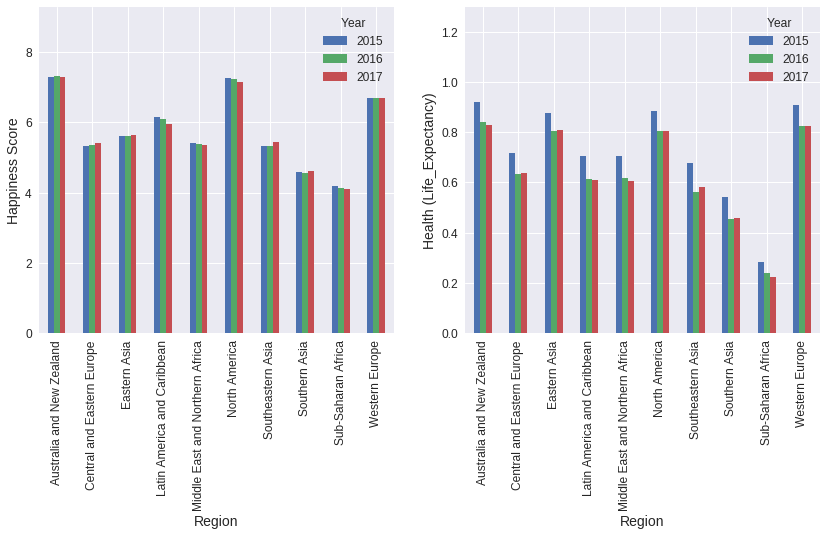

In [26]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

table1 = pd.pivot_table(df, index='Region', columns='Year', values="Happiness_Score")
table1.plot(kind='bar', ax=ax1)
ax1.set_ylabel("Happiness Score");

table2 = pd.pivot_table(df, index='Region', columns='Year', values="Health_(Life_Expectancy)")
table2.plot(kind='bar', ax=ax2)
ax2.set_ylabel("Health (Life_Expectancy)");

## adjust the axis to accomadate the legend
ax1.set_ylim((0,9.3))
ax2.set_ylim((0,1.3))

There are some interface limitations when it comes to using the pandas interface for plotting, but it serves as an efficient first pass. You may also notice that if this notebook were to be used as a presentation there is some  exposed plot generation code that can limit communication.  There are ways to hide code in Jupyter, but in keeping with the best practices of storing code in text files for version control as well as the cataloging of plot code here is a script that makes a nicer version of the same plot with the `artist` interface. See the file for details on the additional customization.

* [make-happiness-summary-plot.py](../scripts/make-happiness-summary-plot.py)

... data ingestion
... creating plot
../images/happiness-summary.png created.


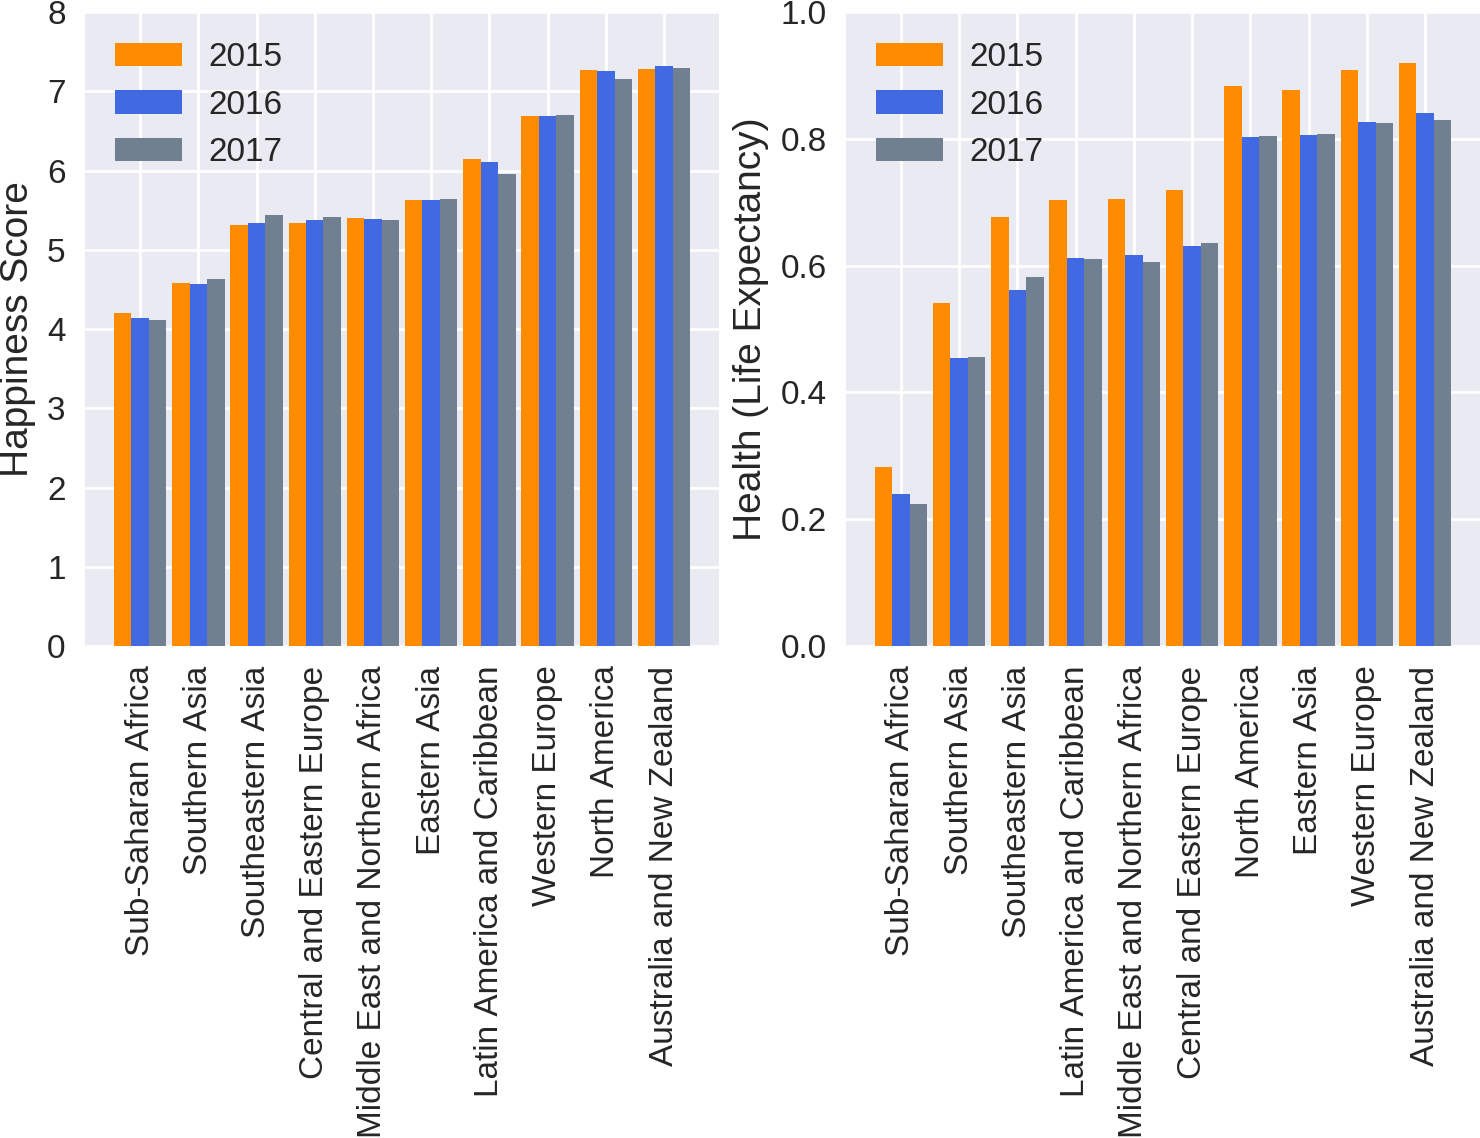

In [28]:
!python ../scripts/make-happiness-summary-plot.py
Image(os.path.join(IMAGE_DIR, "happiness-summary.png"), width=800, height=600)

### Pair plots and correlation

There are many useful tools and techniques for EDA that could be a part of these materials, but the focus of this course is on the workflow itself.  In addition to indispensable summary tables and simple plots there is one more that deserves special mention, because of its utility, and that is the pair plot or sometimes referred to as the pairs plot.  At a minimum these are used to visualize the relationships between all pairwise combinations of continuous variables in your data set.  Importantly, we can quantify these relationships using [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence).  There are also ways to get additional insight into the data by overlaying discrete variables, using a coloring scheme, and including univariate distributions along the diagonal. 

* [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* [seaborn pairwise correlations plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

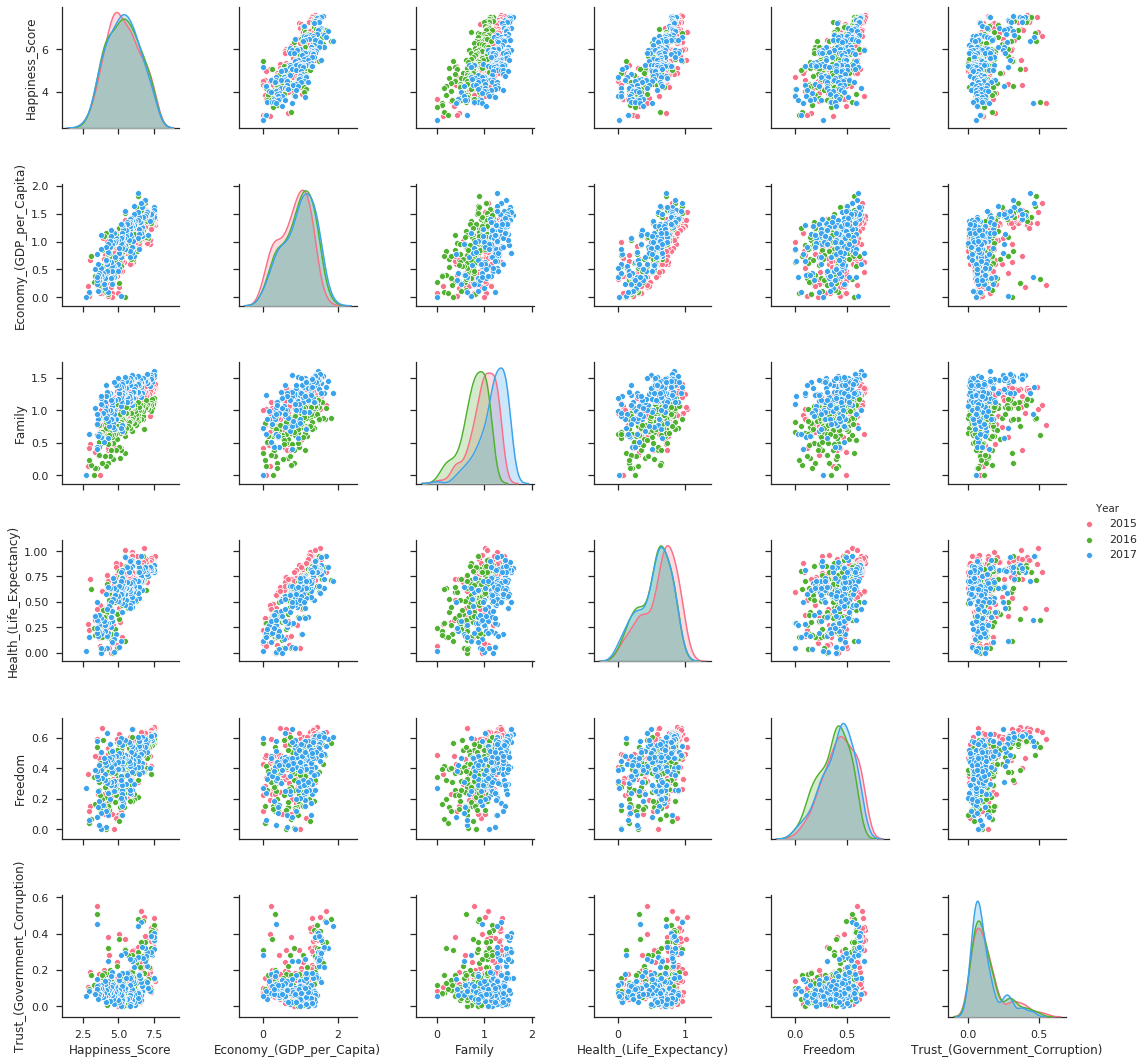

In [29]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

## make a pair plot
columns = ['Happiness_Score','Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
           'Freedom', 'Trust_(Government_Corruption)']

axes = sns.pairplot(df,vars=columns,hue="Year",palette="husl")

### QUESTION: Correlation plot

Use the [following code snippet from the seaborn examples](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) to create your own grid plot of pairwise correlations for this data set.  Do this as a separate script then run and display the image here.

**1-** Create a .py script in the `scripts` folder (You can name this script `make-happiness-corr-plot.py`). This script should have the same structure as the provided `make-happiness-summary-plot.py`. The code that you write should create a correlation matrix following the example in the link above and save this plot as a .png file in the `images` folder.<br>
**2-** Once you have run the script from this notebook, load the saved .png image in the notebook.

In [32]:
%%writefile ../scripts/make-happiness-corr-plot.py
 

"""

ABOUT:
    example script to create a summary plot from world happiness data

DATA:
    data produced by: http://unsdsn.org/about-us/vision-and-organization
    data compilied from: https://worldhappiness.report

DIRECTORIES
    You can modify the DATA_DIR and IMAGE_DIR directly or create a directory called 'data'
    and another called 'images'.  Ensure the csv file is in the data dir

"""

######## NOTE ########
# Most of the code in this file is from make-happiness-summary-plot.py
# which is available as part of the case study.
# Code used in the solution to: ** QUESTION: Correlation plot **
# is labeled with that comment.
######################

import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## plot style and fonts
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

BLUE = "#0066FF"
ORANGE = "#FF6600"
GREY = "#777777"

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title


DATA_DIR = os.path.join("..","data") 
IMAGE_DIR = os.path.join("..","images")


######## SOLUTION FUNC ####################
######## QUESTION: Correlation plot #######

## New import (should move this to the rest of the imports)
import seaborn as sns


import seaborn as sns



def create_pair_plot(columns = None):
    sns.set(style="ticks", color_codes=True)

    ## make a pair plot
    ##columns = ['Happiness_Score','Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
    ##           'Freedom', 'Trust_(Government_Corruption)']
    columns = columns

    axes = sns.pairplot(df,vars=columns,hue="Year",palette="husl")

    image_path = os.path.join(IMAGE_DIR,"pair_plots.png")    
    plt.savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=500)
    print("{} created.".format(image_path))



def create_correlation_grid_plot(df, columns):
    """
    Create correlation grid using data from DataFrame df, specify which 
    columns to display with columns param. 

    Inspired by: 
    https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    """

    # Compute the correlation matrix
    corr = df[columns].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    image_path = os.path.join(IMAGE_DIR,"happiness-corr-grid.png")    
    plt.savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=500)
    print("{} created.".format(image_path))

######### END: SOLUTION FUNC #############    

def run_data_ingestion():
    """
    ready the 
    data for EDA
    """

    print("... data ingestion")
    
    ## load the data and print the shape
    df = pd.read_csv(os.path.join(DATA_DIR,"world-happiness.csv"),index_col=0)

    ## clean up the column names
    df.columns = [re.sub("\s+","_",col) for col in df.columns.tolist()]

    ## drop the rows that have NaNs
    df.dropna(inplace=True)

    ## sort the data for more intuitive visualization
    df.sort_values(['Year', "Happiness_Score"], ascending=[True, False], inplace=True)

    return(df)
    
if __name__ == "__main__":

    
    df = run_data_ingestion()
    numeric_columns = ['Happiness_Score','Economy_(GDP_per_Capita)', 'Family',
                      'Health_(Life_Expectancy)', 'Freedom', 
                      'Trust_(Government_Corruption)', 'Generosity',
                      'Dystopia_Residual'] 
    create_correlation_grid_plot(df, numeric_columns)
    
    col = ['Happiness_Score','Economy_(GDP_per_Capita)', 
           'Family', 'Health_(Life_Expectancy)',
          'Freedom', 'Trust_(Government_Corruption)']
    create_pair_plot(col)


Overwriting ../scripts/make-happiness-corr-plot.py


... data ingestion
../images/happiness-corr-grid.png created.
../images/pair_plots.png created.


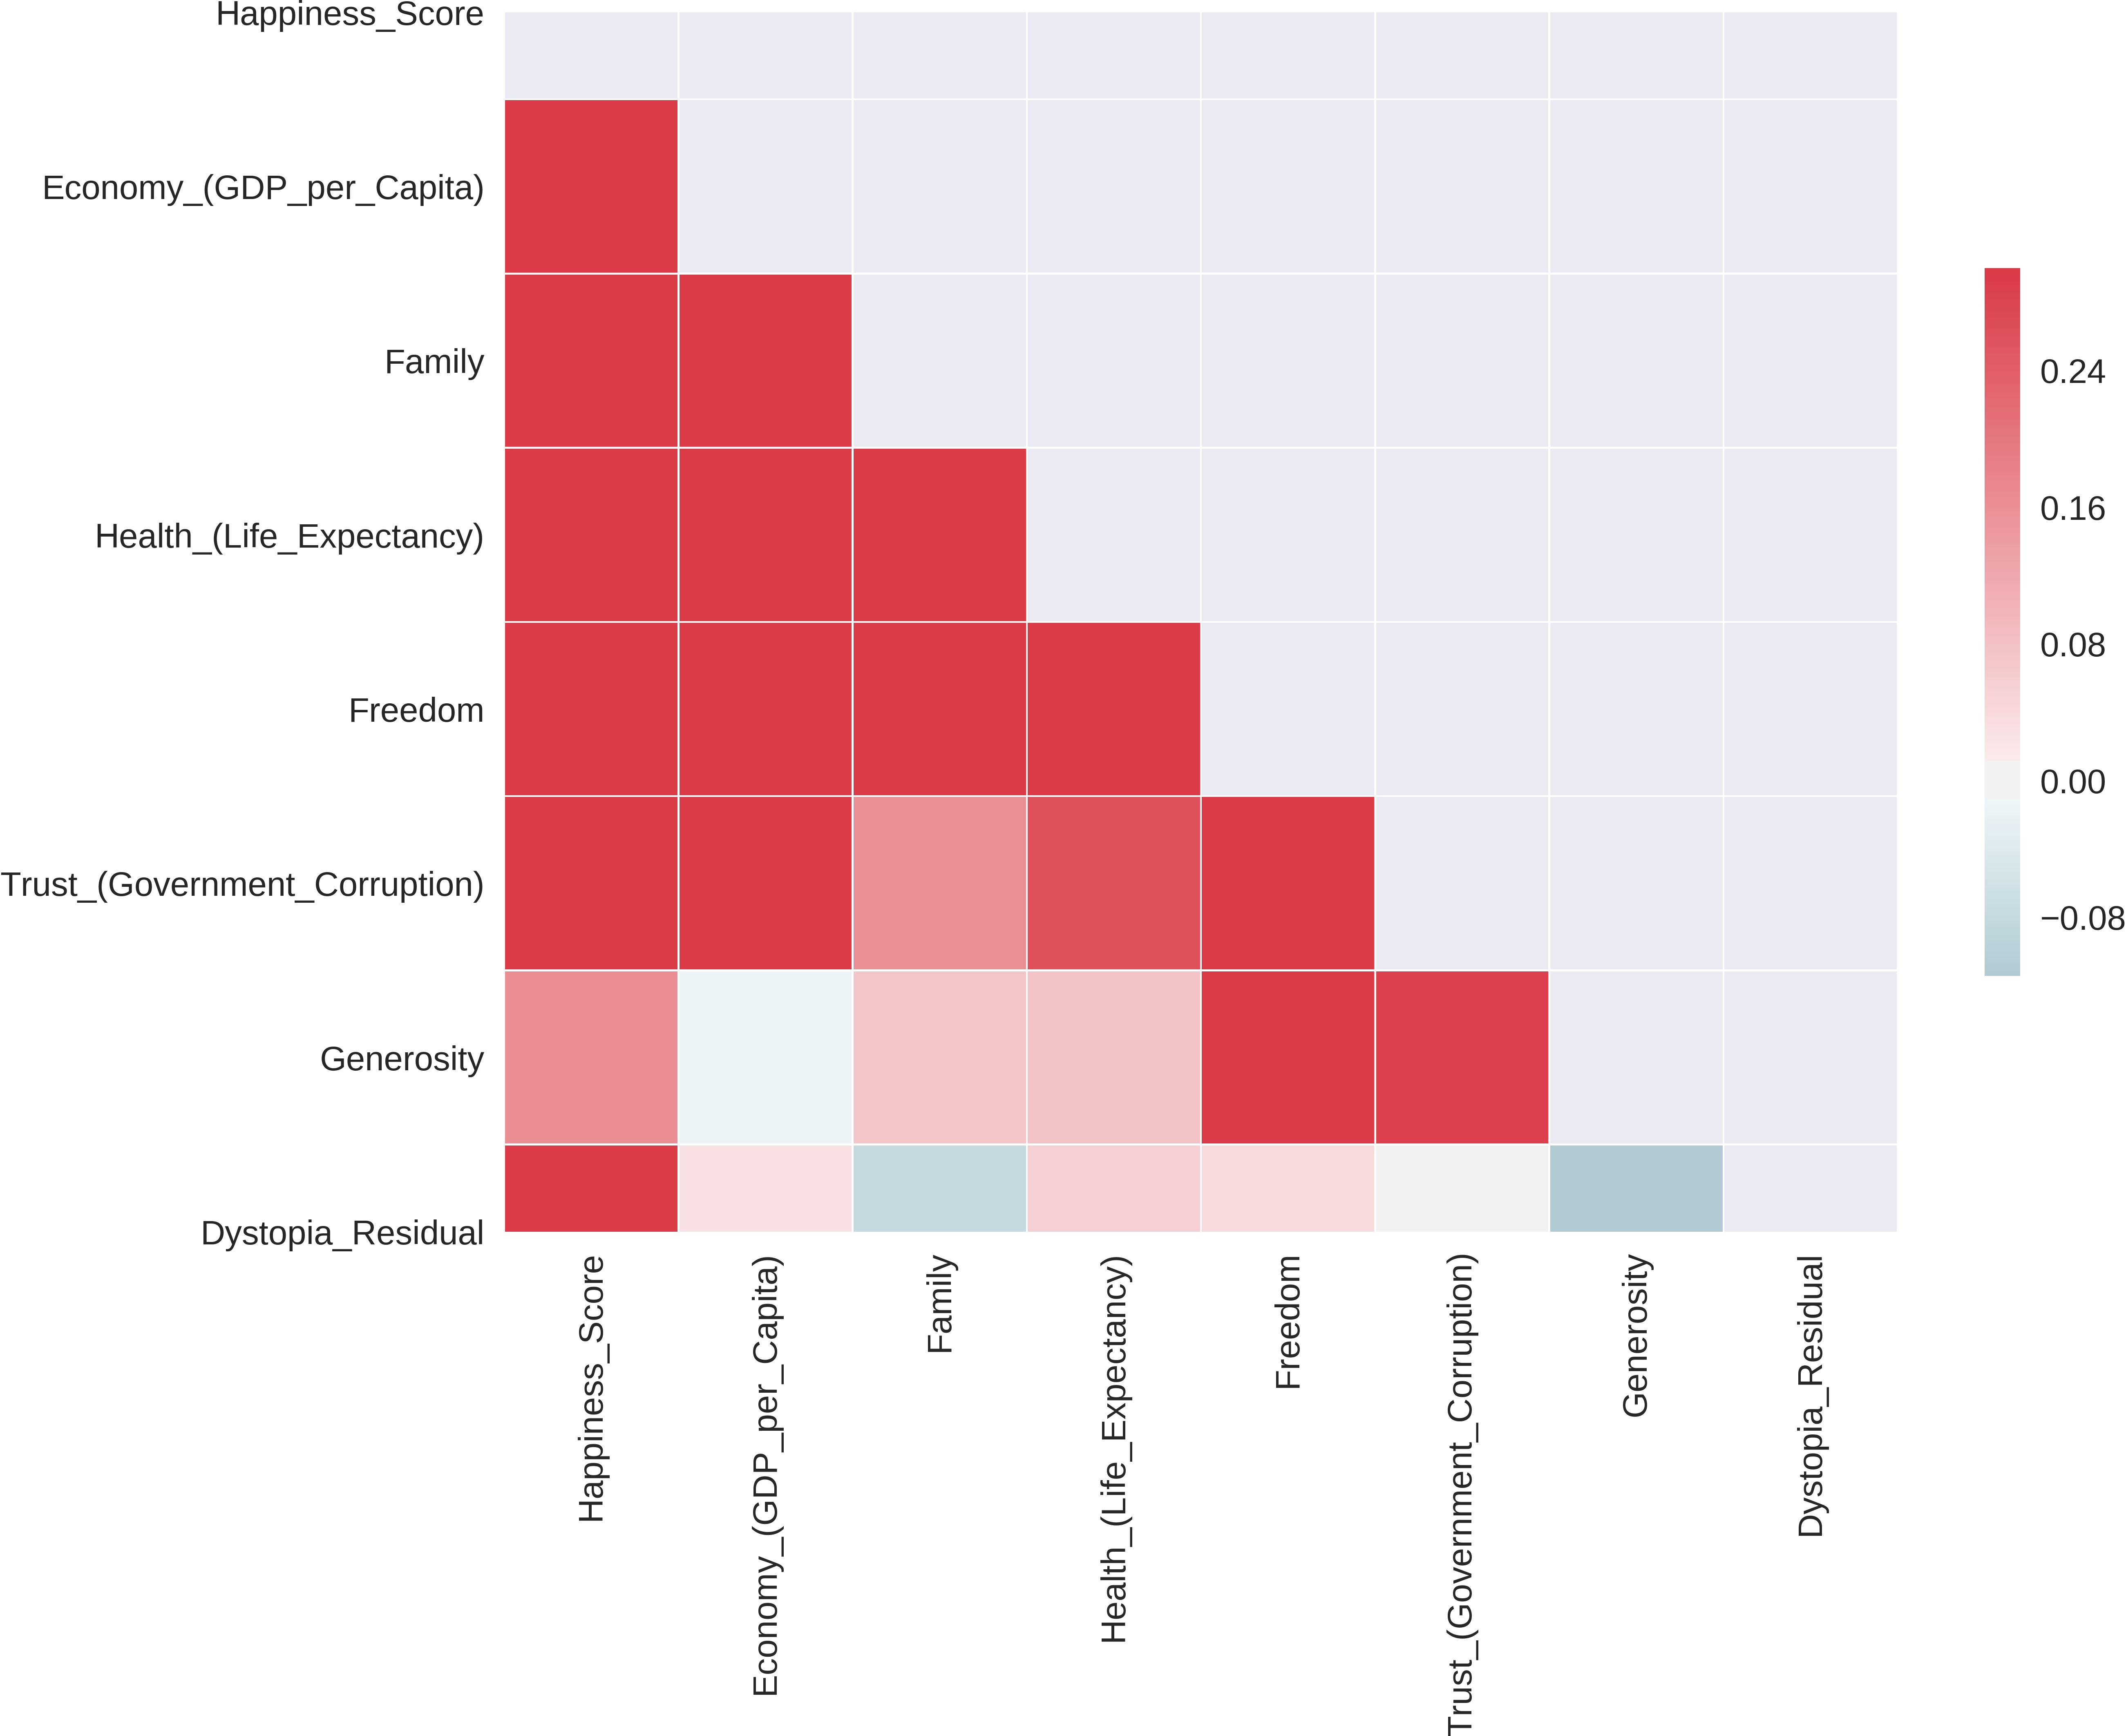

In [33]:
## YOUR CODE HERE
!python ../scripts/make-happiness-corr-plot.py
Image(os.path.join(IMAGE_DIR, "happiness-corr-grid.png"), width=800, height=600)

In [ ]:
Image(os.path.join(IMAGE_DIR, "pair_plots.png"), width=1200, height=1000)

### Beyond simple plots

Simple plots are quick to produce, quick to modify and can be saved in multiple formats.  When we refer to a plot as a *simple plot* it does not necessary mean that it lacks complexity---for lack of a better term it implies that it is a plot like all of those that we have seen so far in this unit.  Dashboards, interactive plots and really any environment where a plot is no longer portable is where the term simple plots no longer apply.